In [1]:
import numpy as np
import pandas as pd
from string import ascii_uppercase

# исходный датасет

In [2]:
#date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='S')

In [3]:
date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='S')

/var/folders/tq/ktg80txs4l321g9zq30s4dm00000gp/T/ipykernel_6145/826562287.py:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='S')


In [4]:
len(date_range)

31449601

In [5]:
df = pd.DataFrame({'date': date_range})

In [6]:
df = pd.concat([df, df, df])

In [7]:
li = [i for i in ascii_uppercase]

In [8]:
df['abc'] = np.random.choice(li, size=len(df))
del li

In [9]:
df['abc'] = df['abc'].astype('string')

In [10]:
df['num'] = np.random.randint(1000, size=len(df))

In [13]:
display(df)

,date,abc,num
0,2023-01-01 00:00:00,T,946
1,2023-01-01 00:00:01,X,69
2,2023-01-01 00:00:02,T,163
3,2023-01-01 00:00:03,Z,132
4,2023-01-01 00:00:04,O,244
...,...,...,...
31449596,2023-12-30 23:59:56,X,64
31449597,2023-12-30 23:59:57,I,528
31449598,2023-12-30 23:59:58,H,272
31449599,2023-12-30 23:59:59,W,62


In [11]:
df.shape

(94348803, 3)

# считывание и процессинг

In [12]:
df.dropna(inplace=True)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(94345186, 3)

In [15]:
df = df[(df['date'].dt.hour < 1) | (df['date'].dt.hour > 3)]

In [16]:
df.shape

(82552009, 3)

In [17]:
df

,date,abc,num
0,2023-01-01 00:00:00,O,887
1,2023-01-01 00:00:01,T,588
2,2023-01-01 00:00:02,C,523
3,2023-01-01 00:00:03,M,919
4,2023-01-01 00:00:04,K,533
...,...,...,...
31449596,2023-12-30 23:59:56,S,389
31449597,2023-12-30 23:59:57,S,980
31449598,2023-12-30 23:59:58,N,478
31449599,2023-12-30 23:59:59,C,511


# Расчет метрик

In [20]:
df.columns

Index(['date', 'abc', 'num'], dtype='object')

In [56]:
# количество уникальных string
df['abc'].nunique()

26

In [21]:
df['hour'] = df['date'].dt.hour

/var/folders/tq/ktg80txs4l321g9zq30s4dm00000gp/T/ipykernel_54785/297645862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['date'].dt.hour


In [22]:
df_agg = df.groupby('hour').agg({'date': 'count', 'num': ['mean', 'median']})
df_agg.columns = ['_'.join(col).strip() for col in df_agg.columns.values]

In [23]:
df_agg

,date_count,num_mean,num_median
hour,,,
0,3931051,499.472396,499.0
4,3931067,499.851321,500.0
5,3931059,499.384545,499.0
6,3931033,499.471555,500.0
7,3931034,499.429407,499.0
8,3931058,499.475043,499.0
9,3931031,499.361591,499.0
10,3931036,499.239120,499.0
11,3931067,499.412247,499.0


# мерж с метриками

In [24]:
df_merged = pd.merge(df, df_agg, left_on='hour', right_index=True, how='left')

In [25]:
df_merged

,date,abc,num,hour,date_count,num_mean,num_median
0,2023-01-01 00:00:00,O,887,0,3931051,499.472396,499.0
1,2023-01-01 00:00:01,T,588,0,3931051,499.472396,499.0
2,2023-01-01 00:00:02,C,523,0,3931051,499.472396,499.0
3,2023-01-01 00:00:03,M,919,0,3931051,499.472396,499.0
4,2023-01-01 00:00:04,K,533,0,3931051,499.472396,499.0
...,...,...,...,...,...,...,...
31449596,2023-12-30 23:59:56,S,389,23,3931024,499.360025,499.0
31449597,2023-12-30 23:59:57,S,980,23,3931024,499.360025,499.0
31449598,2023-12-30 23:59:58,N,478,23,3931024,499.360025,499.0
31449599,2023-12-30 23:59:59,C,511,23,3931024,499.360025,499.0


# аналитические метрики

In [26]:
import matplotlib.pyplot as plt

Axes(0.125,0.11;0.775x0.77)


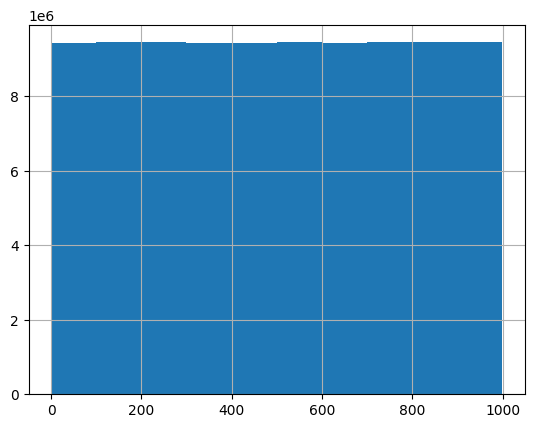

In [16]:
print(df['num'].hist())

In [28]:
lower_bound = df['num'].quantile(0.025)
lower_bound

25.0

In [29]:
upper_bound = df['num'].quantile(0.975)
upper_bound

974.0

In [30]:
#Чтобы построить 95% доверительный интервал для столбца num, я использовал метод quantile() столбца для расчета 2,5-го и 97,5-го процентилей, что даст вам нижнюю и верхнюю границы интервала соответственно.

# визуализация

In [31]:
df.columns

Index(['date', 'abc', 'num', 'hour'], dtype='object')

In [32]:
df['month'] = df['date'].dt.month

/var/folders/tq/ktg80txs4l321g9zq30s4dm00000gp/T/ipykernel_54785/2161493741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month


In [42]:
avg_num_by_month = df.groupby('month')['num'].mean()

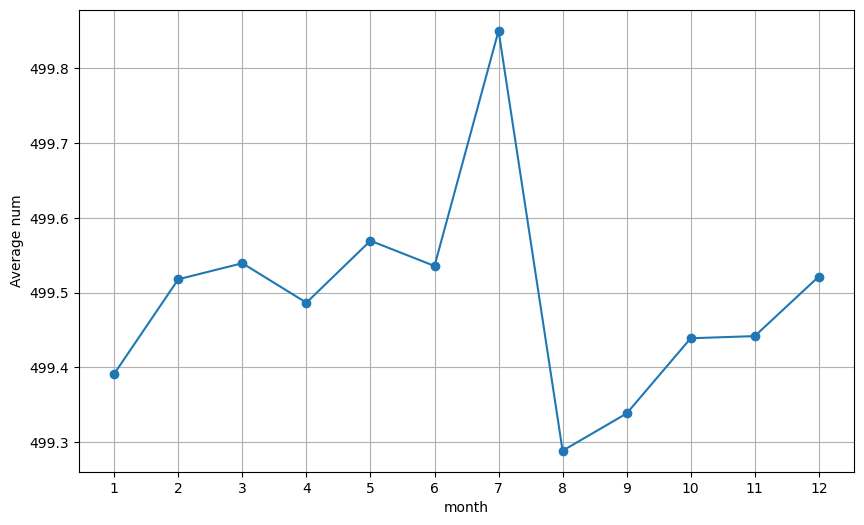

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(avg_num_by_month.index, avg_num_by_month.values, marker='o')
plt.xlabel('month')
plt.ylabel('Average num')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

In [44]:
import seaborn as sns

In [48]:
char_freq = df['abc'].value_counts().reset_index()
char_freq.columns = ['char', 'frequency']

In [49]:
char_freq

,char,frequency
0,H,3177490
1,I,3177471
2,V,3177278
3,S,3177065
4,T,3176881
5,B,3176548
6,P,3176403
7,A,3176102
8,W,3175955
9,E,3175950


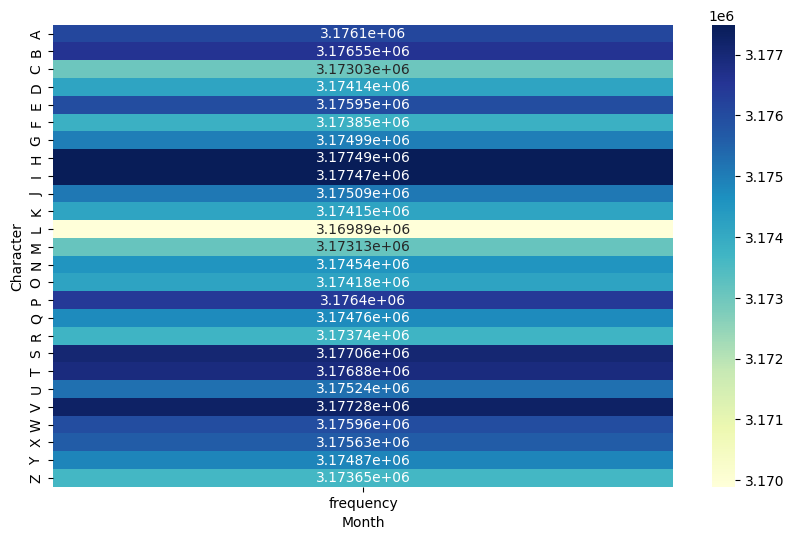

In [50]:
plt.figure(figsize=(10, 6))
heatmap_data = pd.pivot_table(char_freq, values='frequency', index='char', aggfunc='sum')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')
plt.xlabel('Month')
plt.ylabel('Character')
plt.show()

# доп задание

In [51]:
df.shape

(82552009, 5)

In [52]:
np.random.seed(0)
n = len(df)
split_1 = int(0.25 * n)
split_2 = int(0.50 * n)
split_3 = int(0.75 * n)

df_1 = df.sample(frac=1, random_state=0).head(split_1)
df_2 = df.sample(frac=1, random_state=0).head(split_2)[split_1:split_2]
df_3 = df.sample(frac=1, random_state=0).tail(n - split_2)

In [53]:
df_1.shape, df_2.shape, df_3.shape

((20638002, 5), (20638002, 5), (41276005, 5))